In [152]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from copy import copy

I =32
J =32
#IJ  are the shape of the simulated optical lattice
A = np.empty((I,J))
for i in range(I):
    for j in range(J):
        A[i,j]= 1
        
JKBTMAX = 5 #range of temperature 
Steplen = 0.025 # step length
K = int(JKBTMAX/Steplen) +1 
C = np.empty((I,J,K))
for k in range(K):
    for i in range(I):
        for j in range(J):
            C[i,j,k]=0

import random
save = []
qiguaile = []
W =12560000
for JKBT in range(K):
    Temp = K-JKBT 
    for w in range(W):
        i = int(np.round((I-1)*random.uniform(0,1)))
        j = int(np.round((J-1)*random.uniform(0,1)))
        A[i,j]=-A[i,j]
        if i==0:
            im=I-1
        else:
            im=i-1
        if i==I-1:
            ip=0
        else:
            ip=i+1
        if j==0:
            jm=J-1
        else:
            jm=j-1
        if j==J-1:
            jp=0
        else:
            jp=j+1
        
        
        dE =-2* (A[i,j]*A[ip,j]+A[i,j]*A[i,jp]+A[i,j]*A[im,j]+A[i,j]*A[i,jm])
        if dE<0:
            A[i,j] = A[i,j]
        else:
            if np.exp(-dE/(Temp*Steplen))<random.uniform(0,1):
                A[i,j] = -A[i,j]
                
        if w>=W*0.9:
            C[:,:,JKBT] = C[:,:,JKBT]+A[:,:]
            if w%25600==0:
                save.append(copy(A[:,:]))
    C[:,:,JKBT] = C[:,:,JKBT]/(W*0.1)            
    qiguaile.append(C[:,:,JKBT])

In [153]:
M=[]
for i in range(K):
    M.append(np.sum(C[:,:,i]))8
M = np.asarray(M)

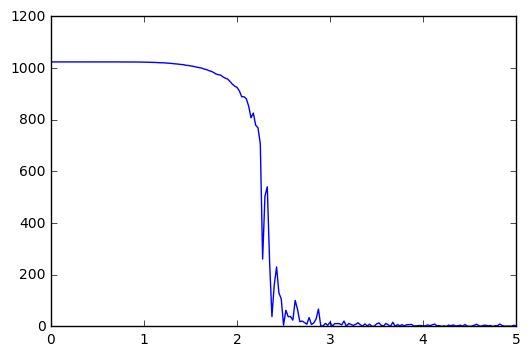

In [155]:
plt.plot([5-0.025*i for i in range(K)],np.abs(M))
plt.show()

In [129]:
save = np.reshape(save,[-1,256])
np.shape(save)
save = np.asarray(save)
np.savetxt("IsingModel32_32simul_2.csv",save,delimiter=',')

In [120]:
save = np.reshape(save,[-1,256])

np.shape(save)

save = np.asarray(save)

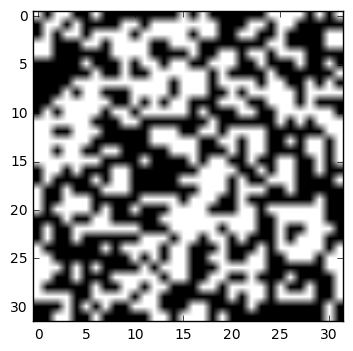

In [133]:
plt.imshow(save[1])
plt.gray()
plt.show()

In [136]:
np.shape(save)

(9849, 32, 32)

In [141]:
T = np.zeros((9849,))
u=5.025
for i in range(9849):
    if i%49==0:
        u = u- 0.025
    T[i]=u

In [150]:
T.shape

(9849,)

In [156]:
save = np.reshape(save,[-1,32*32])
save = np.asarray(save)
np.savetxt("IsingModel32_32simul_2.csv",save,delimiter=',')
np.savetxt("Temp32_32_2.csv",T,delimiter=',')

In [140]:
20099/101

199.0

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from copy import copy

I =15
J =15
#IJ  are the shape of the simulated optical lattice
A = np.empty((I,J))
for i in range(I):
    for j in range(J):
        #A[i,j]= 2*np.pi*random.random()-np.pi
        A[i,j]=0
B = np.empty((I,J))
for i in range(I):
    for j in range(J):
        B[i,j]= 2*np.pi*random.random()-np.pi
        
        
JKBTMAX = 5 #range of temperature 
Steplen = 0.025 # step length
K = int(JKBTMAX/Steplen) +1 
C = np.empty((I,J,K))
for k in range(K):
    for i in range(I):
        for j in range(J):
            C[i,j,k]=0

import random
save = []
qiguaile = []
W =2560000
for JKBT in range(K):
    Temp = K-JKBT 
    for w in range(W):
        i = int(np.round((I-1)*random.uniform(0,1)))
        j = int(np.round((J-1)*random.uniform(0,1)))
        B[i,j]= 2*np.pi*random.random()-np.pi
        if i==0:
            im=I-1
        else:
            im=i-1
        if i==I-1:
            ip=0
        else:
            ip=i+1
        if j==0:
            jm=J-1
        else:
            jm=j-1
        if j==J-1:
            jp=0
        else:
            jp=j+1
        
        
        dE =(np.cos(B[i,j]-A[ip,j])+np.cos(B[i,j]-A[i,jp])+np.cos(B[i,j]-A[im,j])+np.cos(B[i,j]-A[i,jm])+np.cos(B[i,j]-A[ip,jp])+np.cos(B[i,j]-A[im,jm]))-(np.cos(A[i,j]-A[ip,j])+np.cos(A[i,j]-A[i,jp])+np.cos(A[i,j]-A[im,j])+np.cos(A[i,j]-A[i,jm])+np.cos(A[i,j]-A[ip,jp])+np.cos(A[i,j]-A[im,jm]))
        if dE<0:
            A[i,j] = B[i,j]
        else:
            if np.exp(-dE/(Temp*Steplen))<random.uniform(0,1):
                A[i,j] = A[i,j]
            else:
                A[i,j] = B[i,j]
        if w>=W*0.9:
            C[:,:,JKBT] = C[:,:,JKBT]+A[:,:]
            if w%2560==0:
                save.append(copy(A[:,:]))
    C[:,:,JKBT] = C[:,:,JKBT]/(W*0.1)            
    qiguaile.append(C[:,:,JKBT])

In [238]:
plt.imshow(save[0])
plt.show()

TypeError: Invalid dimensions for image data

In [235]:
num_0 = 20000
plt.imshow(save[num_0])
plt.show()
save[num_0]

TypeError: Invalid dimensions for image data

In [233]:
T = np.zeros((20100,))
u=5.025
for i in range(20100):
    if i%100==0:
        u = u- 0.025
    T[i]=u
    
    
save = np.reshape(save,[-1,15*15])
save = np.asarray(save)
np.savetxt("tri-XYModel15_15simul.csv",save,delimiter=',')
np.savetxt("tri-Temp15_15.csv",T,delimiter=',')

In [237]:
np.shape(save)

(20100, 225)

In [236]:
save

array([[ 2.7284262 ,  1.76332604, -1.00819854, ..., -1.68381246,
        -2.58786608,  1.58260745],
       [-0.60391797,  2.0286281 , -1.82652867, ...,  0.6745982 ,
        -2.21499652,  1.58260745],
       [-2.23995719,  0.07963302,  2.68535817, ..., -3.10623033,
        -0.48461356, -2.31494143],
       ..., 
       [-2.28144591,  1.83580387, -0.38280405, ..., -0.17594765,
        -2.26066206,  1.93448988],
       [-2.28144591,  1.83580387, -0.38280405, ..., -0.17594765,
        -2.3413894 ,  1.93448988],
       [-2.28144591,  1.83580387, -0.38280405, ..., -0.17594765,
        -2.32813997,  1.93448988]])

In [230]:
20100/201

100.0

In [231]:
K

201